In [2]:
#Importo librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('default')
sns.set()

In [3]:
#Cargo el DataFrame
df = pd.read_csv('events.csv', low_memory = False, parse_dates = ['timestamp'], infer_datetime_format = True,
                    dtype = {'event': 'category','condition': 'category','storage': 'category', 'color': 'category', 'staticpage': 'category', 'campaign_source': 'category', 'search_engine': 'category', 'channel': 'category', 'new_vs_returning': 'category', 'region': 'category', 'country': 'category', 'device_type': 'category'})

# Analisis de la condición de los celulares

#### Mostramos el evento según la condicion que se encuentra el celular

In [4]:
aux=df.loc[((df['event'] == 'viewed product') | (df['event'] == 'checkout') | (df['event'] == 'conversion')), ['event','condition']]
condicion_evento = pd.crosstab(aux['condition'], aux['event'])
condicion_evento

event,checkout,conversion,viewed product
condition,,,
Bom,15305,538,227171
Muito Bom,8184,352,142823
Excelente,9141,258,143578
Bom - Sem Touch ID,1090,22,14183
Novo,13,2,1176


#### Hacemos el gráfico del mismo

[Text(0,0.5,'Porcentaje'),
 Text(0.5,0,'Evento'),
 Text(0.5,1,'Proporcion de condicion de celular por evento')]

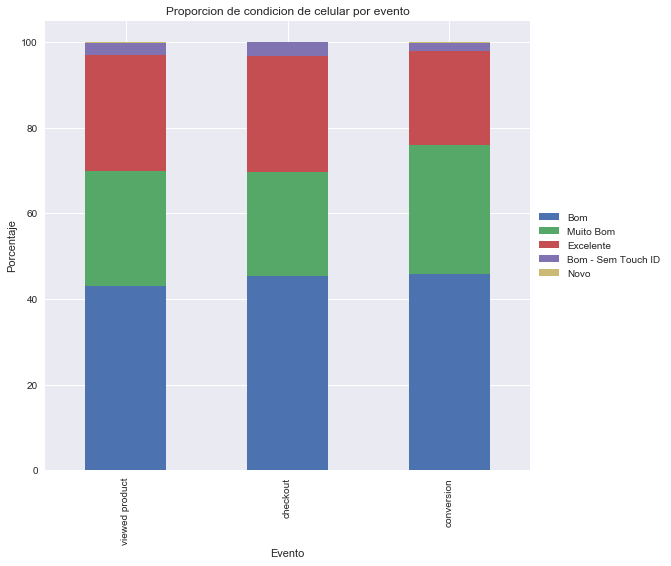

In [7]:
condicion_evento_norm = pd.DataFrame()
condicion_evento_norm['viewed product'] = (condicion_evento['viewed product'] / condicion_evento['viewed product'].sum()) * 100
condicion_evento_norm['checkout'] = (condicion_evento['checkout'] / condicion_evento['checkout'].sum()) * 100
condicion_evento_norm['conversion'] = (condicion_evento['conversion'] / condicion_evento['conversion'].sum()) * 100
sns.set(rc={'figure.figsize':(8.7,8.27)})
ax = condicion_evento_norm.T.plot.bar(stacked=True)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set(xlabel='Evento', ylabel='Porcentaje', title = 'Proporcion de condicion de celular por evento')

Como se puede ver en el gráfico, la gente tiende a buscar y comprar más los celulares que no estan en las mejores condiciones (bom). La participacion de los celulares nuevos es casi inexistente. Vemos un decremento en la participacion de celulares de condicion excelente en las conversiones.

In [ ]:
g = sns.countplot(x="condition", hue="event", data=aux, palette="hls")
g.set_title("Cantidad de eventos por condicion del celular", fontsize=18)
g.set_xlabel("condicion", fontsize=18)
g.set_ylabel("Cantidad de eventos", fontsize=18)

no se puede ver bien porque la cantidad de viewed product

In [ ]:
auxiliar_celulares2 =df.loc[(pd.notnull(df['sku'])),['sku','condition']].drop_duplicates()
auxiliar_celulares2.reset_index(drop='true')
auxiliar_celulares2.head(5)

In [ ]:
auxiliar_celulares2['celulares'] = 1
cantidad_de_celulares = auxiliar_celulares2.groupby('condition').agg({'celulares':'sum'})

In [ ]:
cantidad_de_celulares

In [ ]:
df1= df.loc[(df['event']=='conversion'),['sku','condition']]

In [ ]:
df1['ventas'] = 1
grupo_ventas_celular = df1.groupby('condition').agg({'ventas':'sum'}) 

In [ ]:
grupo_ventas_celular

In [ ]:
datos_celulares = pd.merge(grupo_ventas_celular,cantidad_de_celulares,on='condition', how='left')

In [ ]:
datos_celulares

In [ ]:
datos_celulares['porcentaje vendido'] = datos_celulares['ventas']/datos_celulares['celulares']
datos_celulares

In [ ]:

ax = datos_celulares['porcentaje vendido'].plot(kind = 'bar')
ax.set_title('Porcentaje de ventas segun la condicion del celular')
ax.set_ylabel('Vendidos/Cantidad de celulares')
ax.set_xlabel('condicion')
plt.xticks(rotation=0)

In [ ]:
ax = datos_celulares[['ventas','celulares']].plot(kind = 'bar')
ax.set_title('ventas y cantidad de celulares')
ax.set_ylabel(' cantidad')
ax.set_xlabel('condicion')
plt.xticks(rotation=0)

Con las dos vistas, se puede observar, que la que más ventas tiene son los celulares que están en peor estado. Los celulares nuevos tienen alto grado de ventas, pero al ser infima la cantidad de celulares nuevos, no se puede asegurar nada.